In [76]:
%load_ext autoreload
%autoreload 2 


import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.grid_search import ParameterGrid
from sklearn import ensemble 
from sklearn import neighbors
import seaborn as sns
sns.set()
import ml_pipeline2
from ml_pipeline2 import *
from sklearn import linear_model
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import svm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support, precision_recall_curve
from sklearn import ensemble 
from sklearn import neighbors



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
### Load Data 
filename = "projects_2012_2013.csv"
data = ml_pipeline2.load_data(filename)


In [72]:
### Clean data 
drop_list= ['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', "school_latitude","school_longitude"]
data = preprocess(data, drop_list)

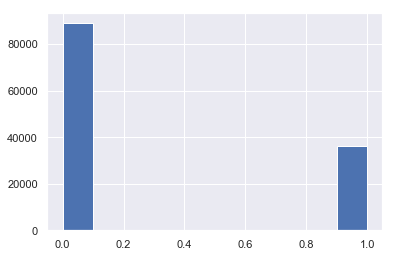

In [90]:
#histogram that gives an idea how many projects are funded within 60 days and which ones arent (1) 
data['predvar'].hist()

In [102]:
#percent of projects that are fully funded in 60 days
data.predvar.sum() / data.predvar.count()

0.2881353219818205

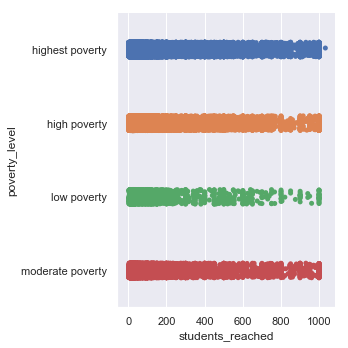

In [100]:
#see relationship between poverty and how many students are affected
plot_data = data[data.students_reached < 1100] #remove a few outliers
sns.catplot(x="students_reached", y="poverty_level", data=plot_data)

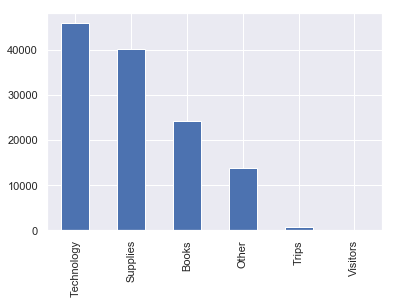

In [101]:
# Technology is the most common ask for funding 
data['resource_type'].value_counts().plot(kind='bar')

In [73]:
#definitions needed to run model 

response = "predvar"
features = [x for x in data.columns if x not in [ 'date_posted', 'datefullyfunded','predvar', 'days_2_fund']]
dummy_list = ["teacher_prefix","school_county","school_district","school_state","school_metro", "school_city", "primary_focus_area","secondary_focus_area","primary_focus_subject","secondary_focus_subject","resource_type","poverty_level","grade_level"]
discrete_list = ["students_reached","total_price_including_optional_support"]
impute_median_list = ["students_reached"]
impute_mean_list = []




/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

<Figure size 432x288 with 0 Axes>

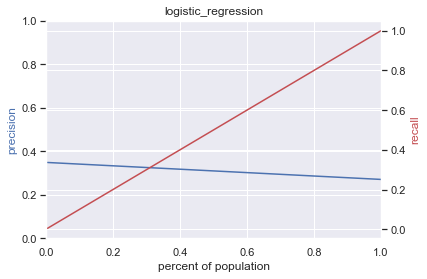

<Figure size 432x288 with 0 Axes>

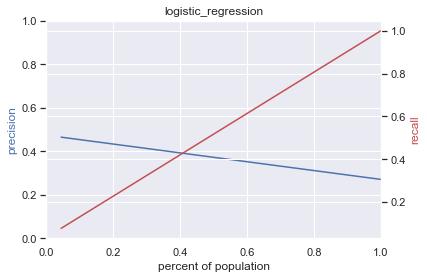

<Figure size 432x288 with 0 Axes>

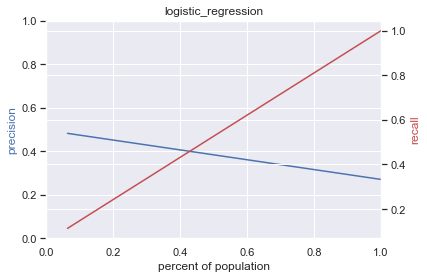

<Figure size 432x288 with 0 Axes>

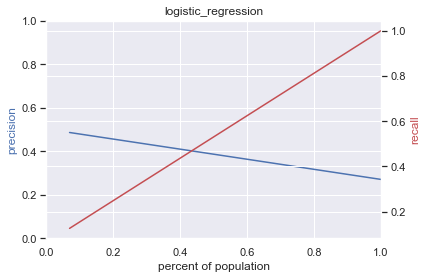

<Figure size 432x288 with 0 Axes>

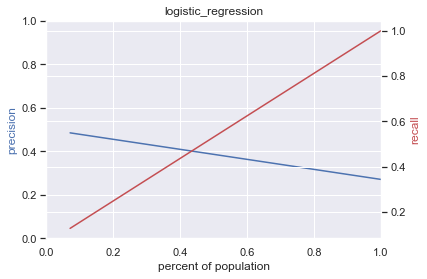

<Figure size 432x288 with 0 Axes>

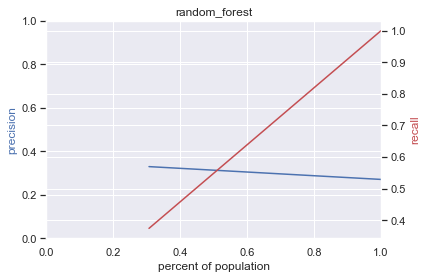

<Figure size 432x288 with 0 Axes>

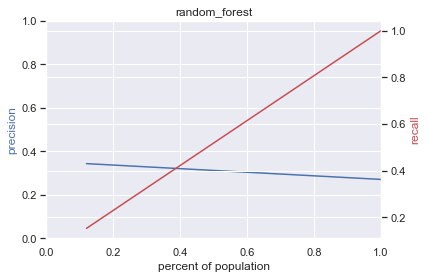

<Figure size 432x288 with 0 Axes>

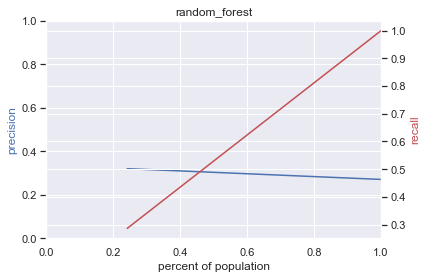

<Figure size 432x288 with 0 Axes>

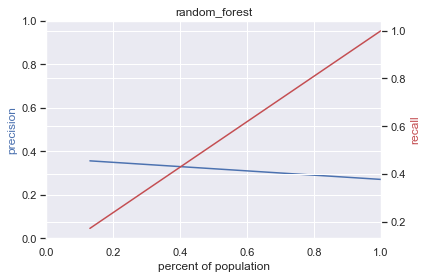

<Figure size 432x288 with 0 Axes>

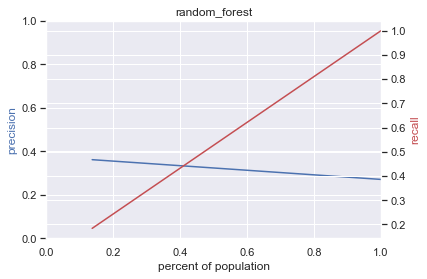

<Figure size 432x288 with 0 Axes>

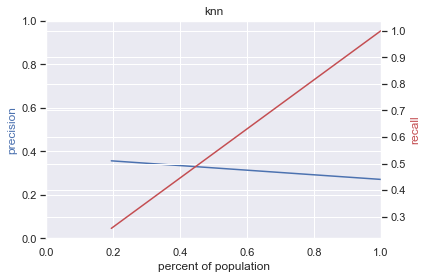

<Figure size 432x288 with 0 Axes>

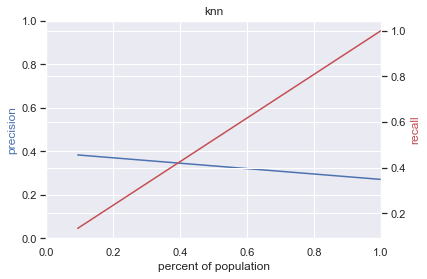

<Figure size 432x288 with 0 Axes>

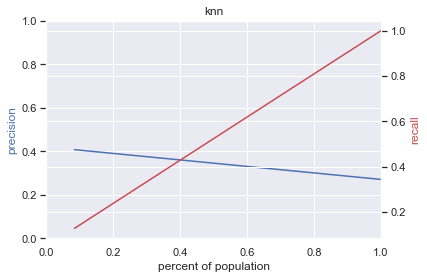

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

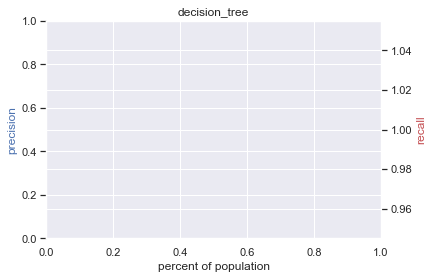

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

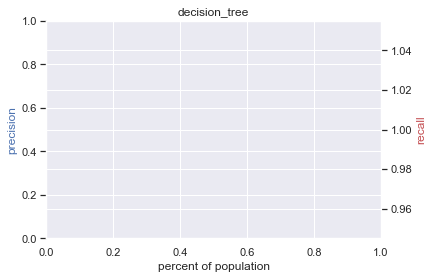

<Figure size 432x288 with 0 Axes>

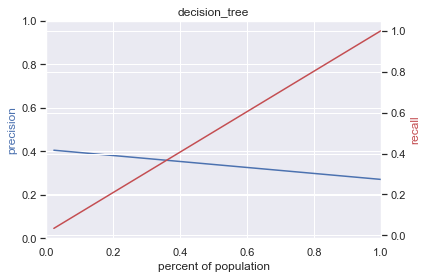

<Figure size 432x288 with 0 Axes>

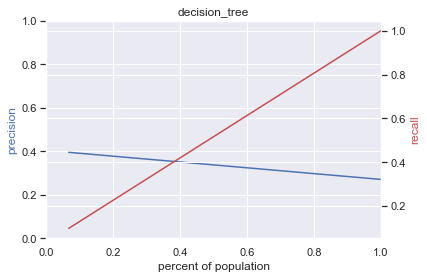

<Figure size 432x288 with 0 Axes>

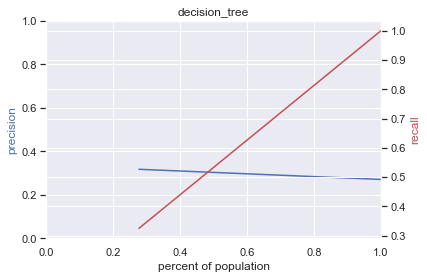

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

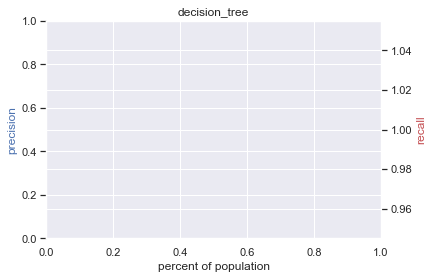

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

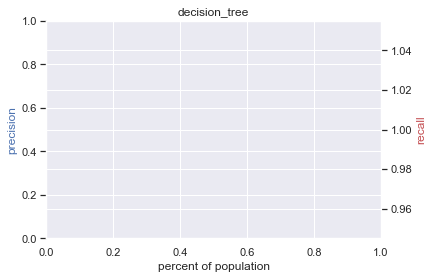

<Figure size 432x288 with 0 Axes>

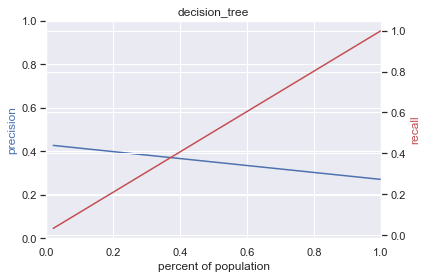

<Figure size 432x288 with 0 Axes>

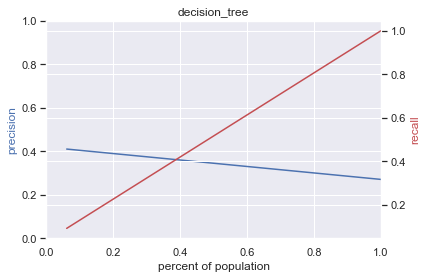

<Figure size 432x288 with 0 Axes>

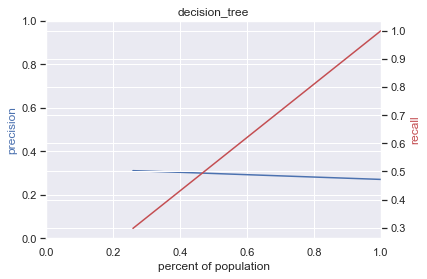

predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'poly'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'poly'}


<Figure size 432x288 with 0 Axes>

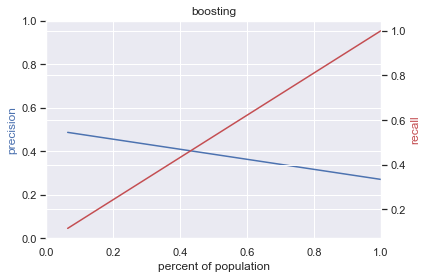

<Figure size 432x288 with 0 Axes>

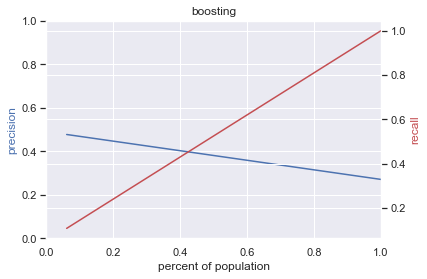

<Figure size 432x288 with 0 Axes>

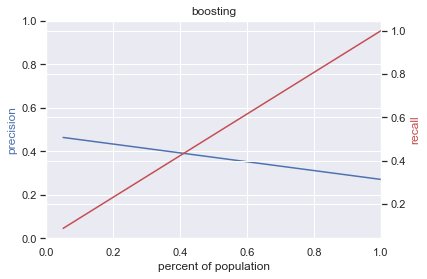

<Figure size 432x288 with 0 Axes>

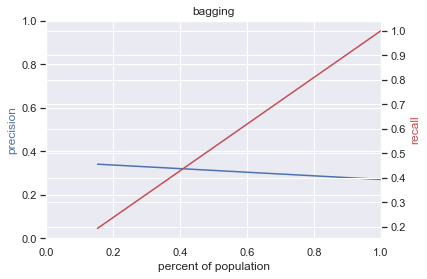

<Figure size 432x288 with 0 Axes>

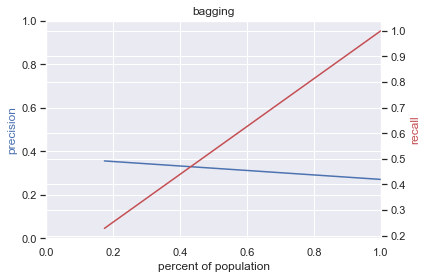

<Figure size 432x288 with 0 Axes>

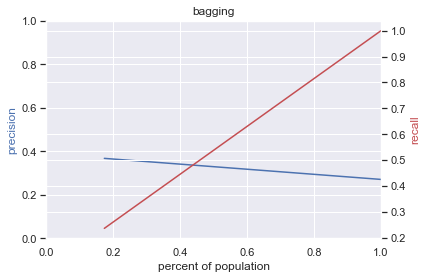

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<Figure size 432x288 with 0 Axes>

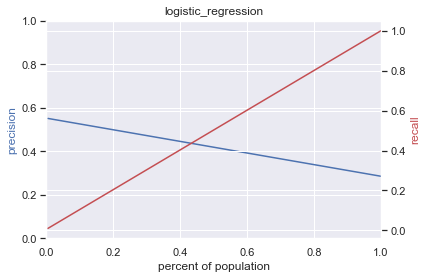

<Figure size 432x288 with 0 Axes>

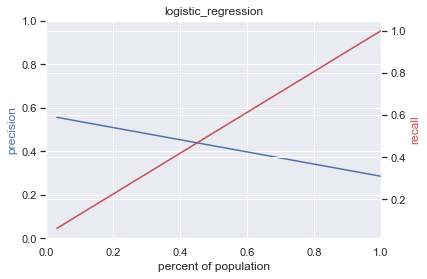

<Figure size 432x288 with 0 Axes>

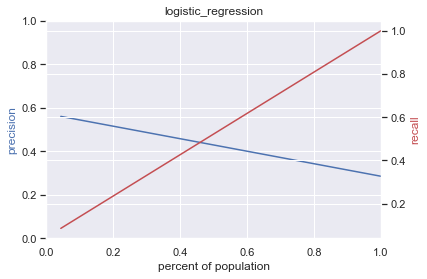

<Figure size 432x288 with 0 Axes>

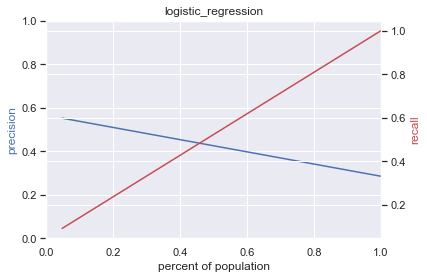

<Figure size 432x288 with 0 Axes>

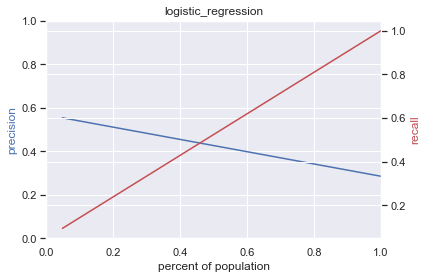

<Figure size 432x288 with 0 Axes>

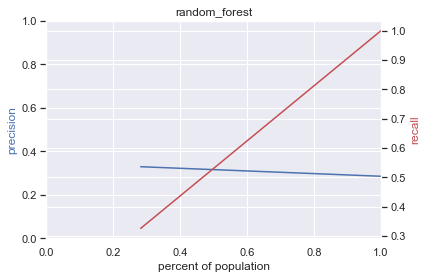

<Figure size 432x288 with 0 Axes>

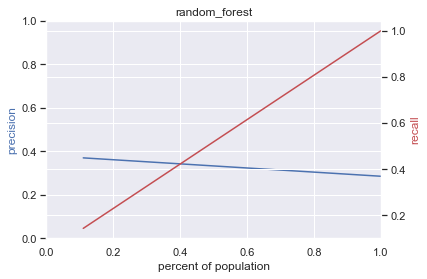

<Figure size 432x288 with 0 Axes>

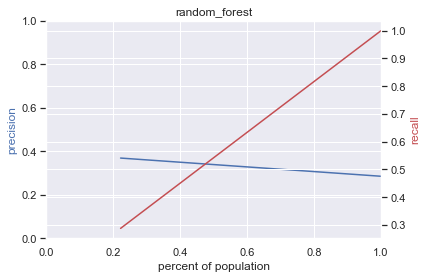

<Figure size 432x288 with 0 Axes>

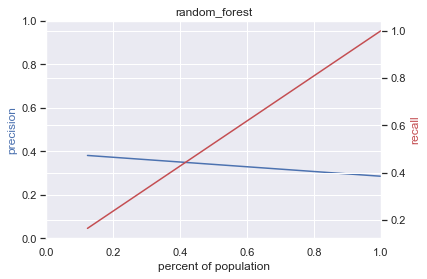

<Figure size 432x288 with 0 Axes>

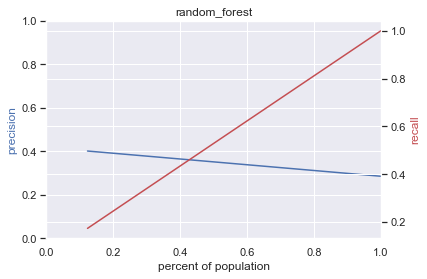

<Figure size 432x288 with 0 Axes>

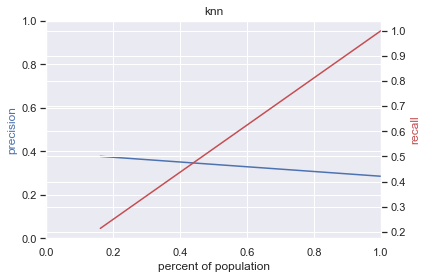

<Figure size 432x288 with 0 Axes>

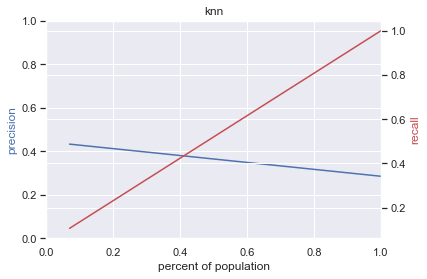

<Figure size 432x288 with 0 Axes>

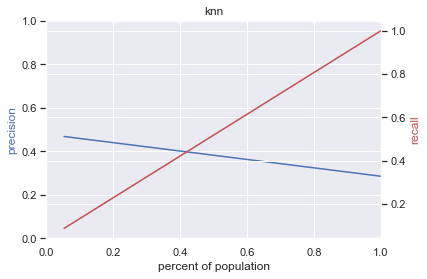

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

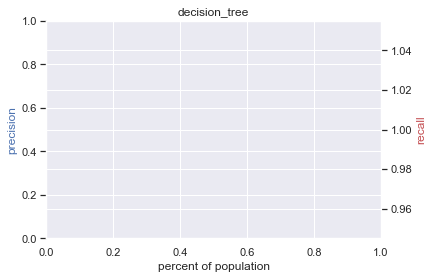

<Figure size 432x288 with 0 Axes>

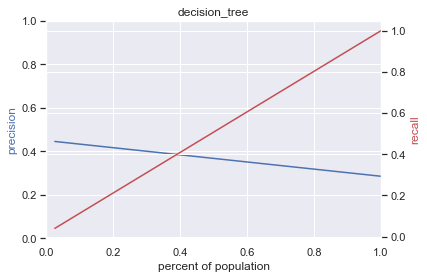

<Figure size 432x288 with 0 Axes>

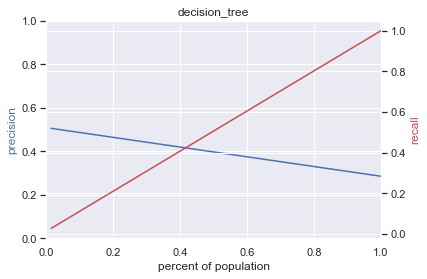

<Figure size 432x288 with 0 Axes>

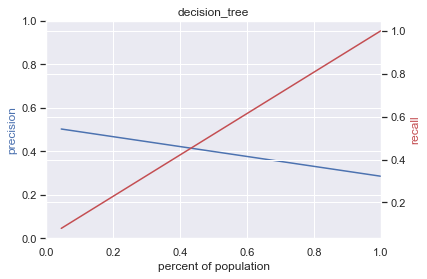

<Figure size 432x288 with 0 Axes>

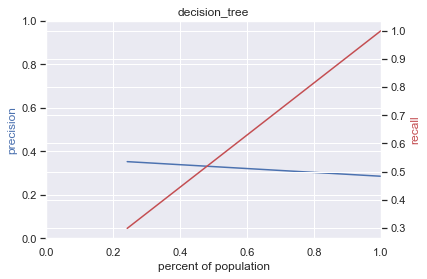

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

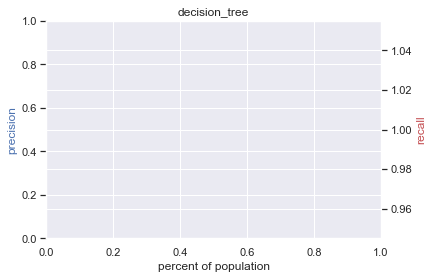

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

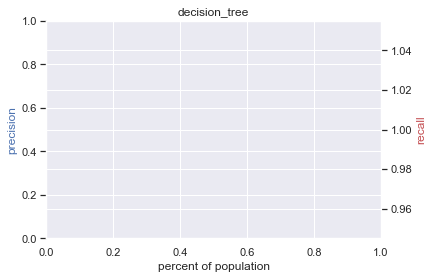

<Figure size 432x288 with 0 Axes>

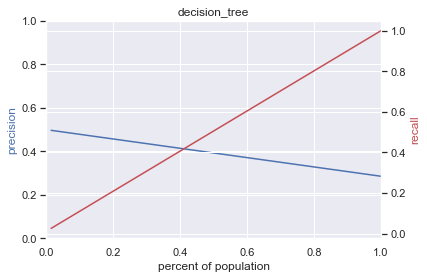

<Figure size 432x288 with 0 Axes>

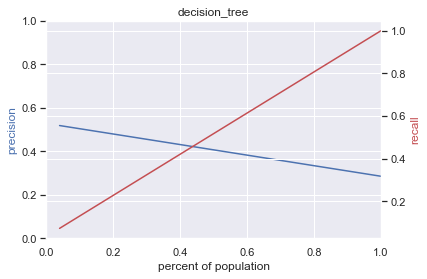

<Figure size 432x288 with 0 Axes>

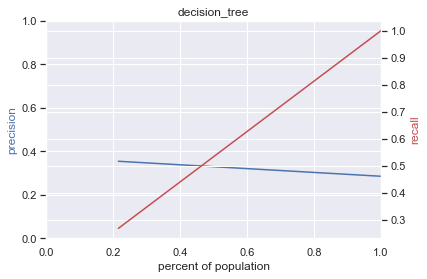

predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'poly'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'poly'}


<Figure size 432x288 with 0 Axes>

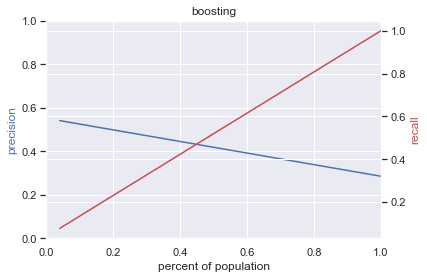

<Figure size 432x288 with 0 Axes>

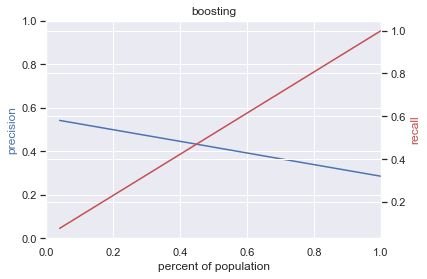

<Figure size 432x288 with 0 Axes>

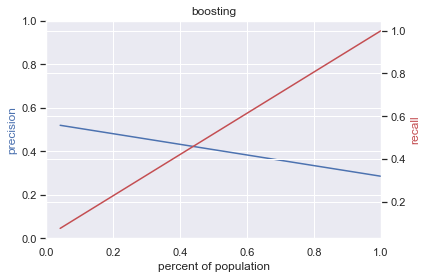

<Figure size 432x288 with 0 Axes>

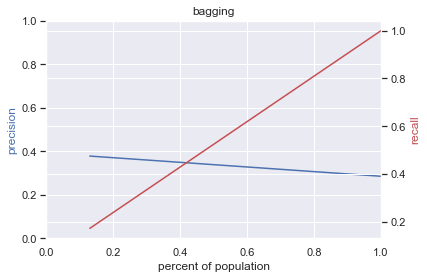

<Figure size 432x288 with 0 Axes>

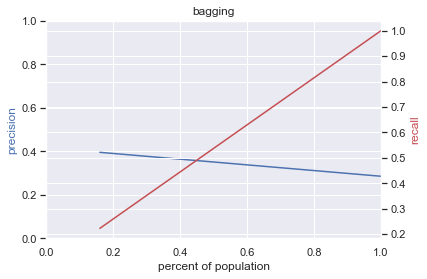

<Figure size 432x288 with 0 Axes>

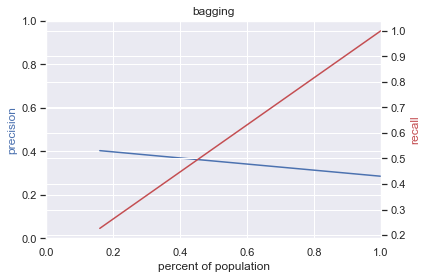

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<Figure size 432x288 with 0 Axes>

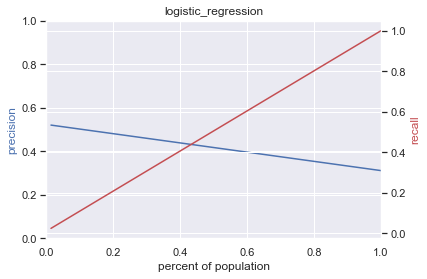

<Figure size 432x288 with 0 Axes>

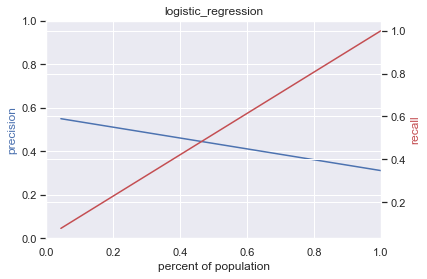

<Figure size 432x288 with 0 Axes>

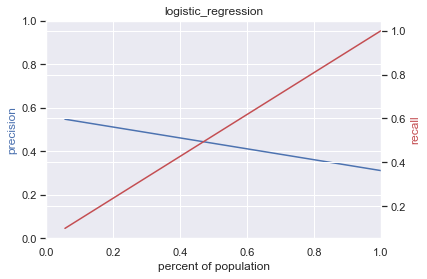

<Figure size 432x288 with 0 Axes>

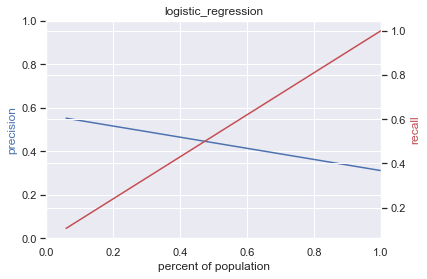

<Figure size 432x288 with 0 Axes>

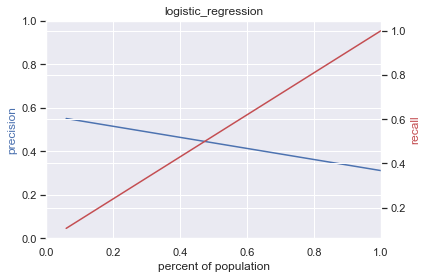

<Figure size 432x288 with 0 Axes>

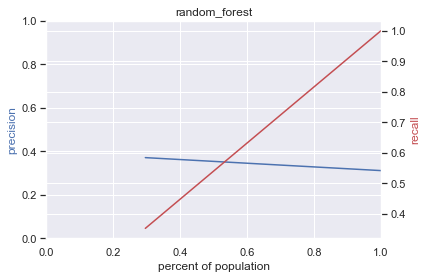

<Figure size 432x288 with 0 Axes>

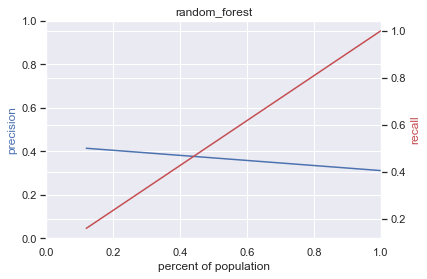

<Figure size 432x288 with 0 Axes>

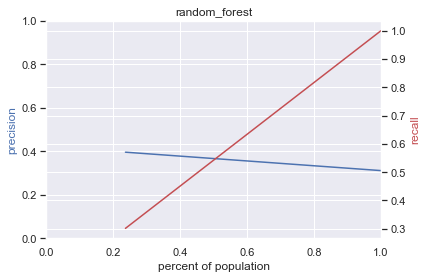

<Figure size 432x288 with 0 Axes>

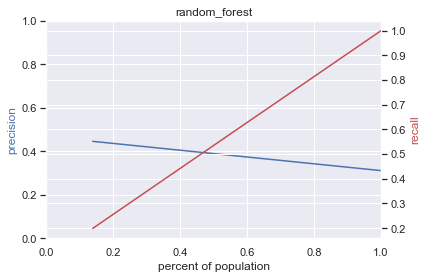

<Figure size 432x288 with 0 Axes>

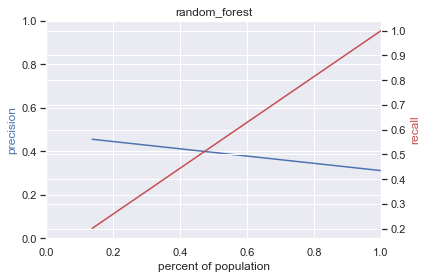

<Figure size 432x288 with 0 Axes>

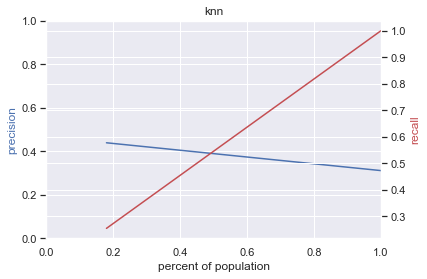

<Figure size 432x288 with 0 Axes>

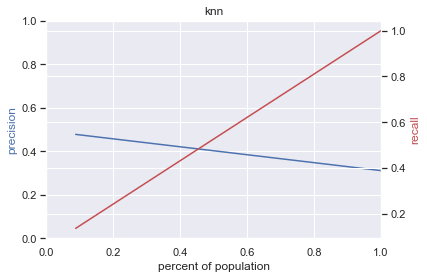

<Figure size 432x288 with 0 Axes>

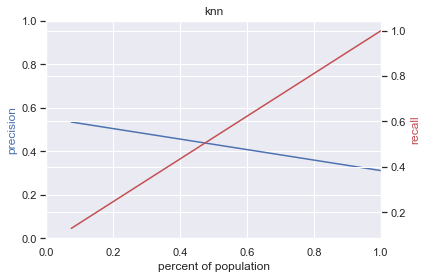

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

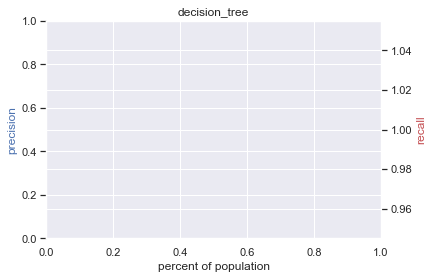

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

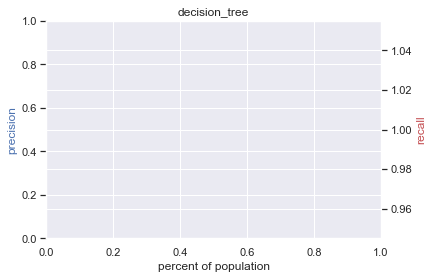

<Figure size 432x288 with 0 Axes>

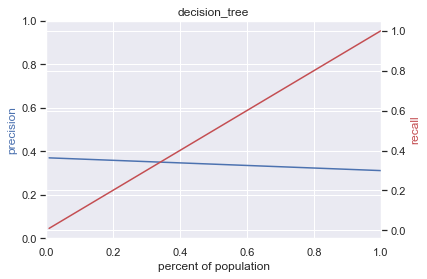

<Figure size 432x288 with 0 Axes>

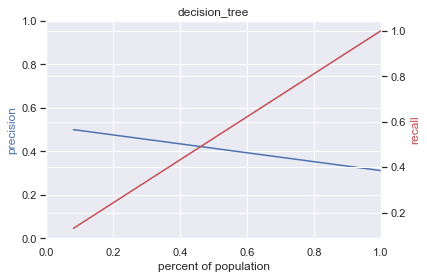

<Figure size 432x288 with 0 Axes>

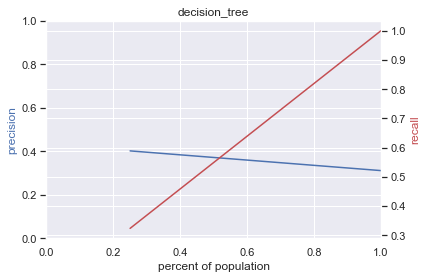

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

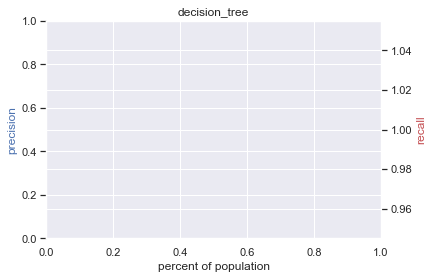

/Users/quinnunderriner/Desktop/school/Machine_Learning/hw3/ml_pipeline2.py:287: RuntimeWarning: invalid value encountered in double_scalars
  def calculate_recall_at_threshold(predicted_scores, true_labels, threshold):
/Users/quinnunderriner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

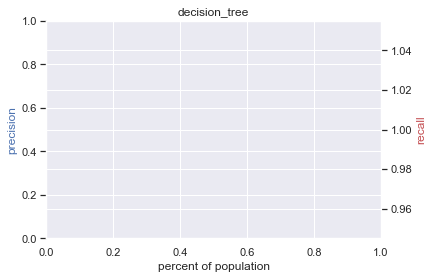

<Figure size 432x288 with 0 Axes>

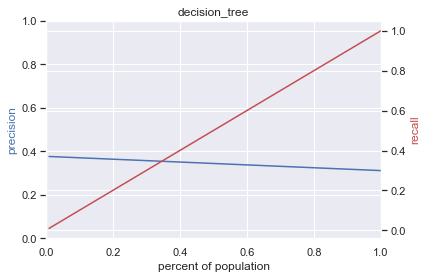

<Figure size 432x288 with 0 Axes>

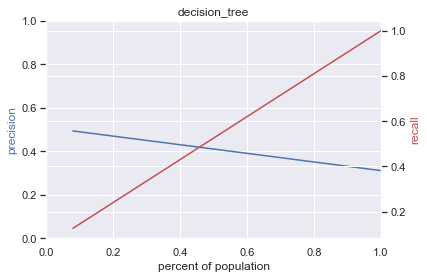

<Figure size 432x288 with 0 Axes>

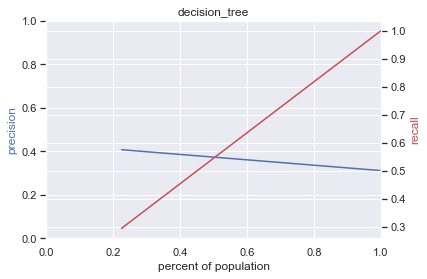

predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 1.0, 'kernel': 'poly'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'linear'}
predict_proba is not available when  probability=False support_vector_machine {'C': 2.0, 'kernel': 'poly'}


<Figure size 432x288 with 0 Axes>

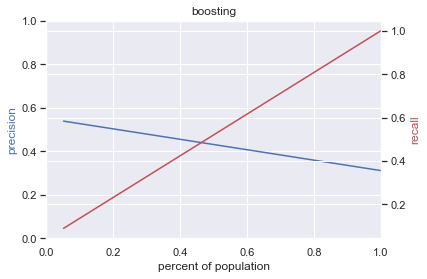

<Figure size 432x288 with 0 Axes>

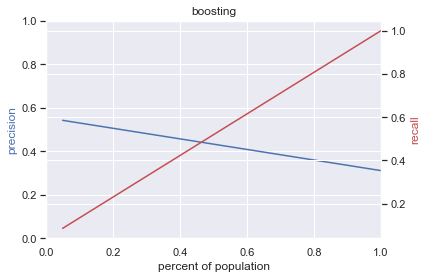

<Figure size 432x288 with 0 Axes>

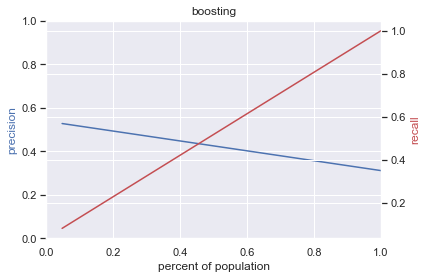

<Figure size 432x288 with 0 Axes>

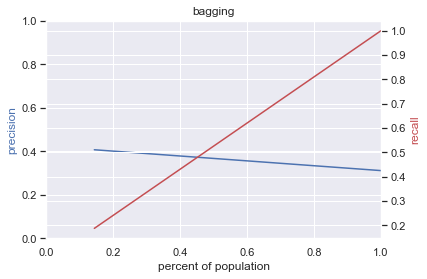

<Figure size 432x288 with 0 Axes>

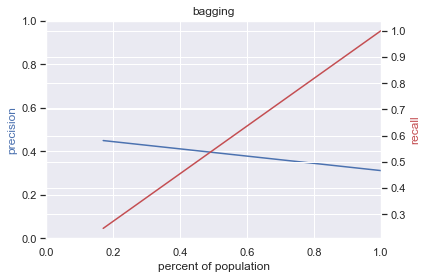

<Figure size 432x288 with 0 Axes>

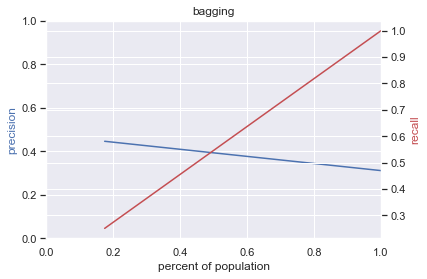

In [104]:
#runs the model and outputs PR curves for each model 

df = run_the_models(data, ['logistic_regression', 'random_forest', 'knn','decision_tree','support_vector_machine','boosting','bagging'], response, features, dummy_list, discrete_list, impute_median_list, impute_mean_list)





In [105]:
#find the best model, given the f1_score 
best_params, best_model = choose_model(df, "f1_score")
print( best_model)

model                      bagging
parameters    {'n_estimators': 20}
Name: 1, dtype: object


In [116]:
#best model sorted by precision at 5 percent 
df['parameters'] = df.parameters.astype(str)
mean_by_group = df.groupby(['model', 'parameters']).mean().reset_index()
best_params = mean_by_group.sort_values("precision_at_0.5", ascending=False)
best_params[["model","parameters","f1_score","precision_at_0.5","recall_at_0.5"]]

,model,parameters,f1_score,precision_at_0.5,recall_at_0.5
23,logistic_regression,{'C': 1},0.534307,0.530231,0.107869
21,logistic_regression,{'C': 0.1},0.531499,0.530106,0.099254
22,logistic_regression,{'C': 10},0.534671,0.529746,0.109202
20,logistic_regression,{'C': 0.01},0.522528,0.523623,0.072110
3,boosting,{'n_estimators': 100},0.529340,0.522228,0.093926
5,boosting,{'n_estimators': 50},0.527909,0.520514,0.089850
4,boosting,{'n_estimators': 30},0.524234,0.503572,0.081067
10,decision_tree,"{'criterion': 'entropy', 'max_depth': 8}",0.526144,0.474059,0.097283
19,logistic_regression,{'C': 0.001},0.503724,0.473304,0.012972
17,knn,{'n_neighbors': 25},0.530774,0.469976,0.114557
